# Import Libraries:

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


# Load Dataset:

In [104]:
# Import library
from google.colab import drive

# Mount  Google Drive /content/drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd

# Load dataset into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Dataset/DataCITASI.csv')

# Prepare Features and Target:

In [106]:
features = data[['BOD', 'COD',  'FecalColiform', 'IP']]
y = data['Class']


In [107]:
# Menampilkan jumlah data di setiap kelas sebelum SMOTE-ADASYN
class_counts = data['Class'].value_counts()
print("Jumlah data di setiap kelas sebelum SMOTE-ADASYN:")
print(class_counts)

Jumlah data di setiap kelas sebelum SMOTE-ADASYN:
Class
3    688
2    306
1     10
4      6
Name: count, dtype: int64


# Handle Imbalanced Data

## Standardize Features:

In [108]:
# Standardisasi Fitur
scaler = RobustScaler()
X_scaled = scaler.fit_transform(features)


## Apply SMOTE-ADASYN:

In [109]:
# Penyeimbangan Data dengan kombinasi SMOTE dan ADASYN
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)

# Pertama menggunakan SMOTE untuk oversampling
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Kemudian menggunakan ADASYN untuk oversampling lebih lanjut
X_resampled, y_resampled = adasyn.fit_resample(X_smote, y_smote)

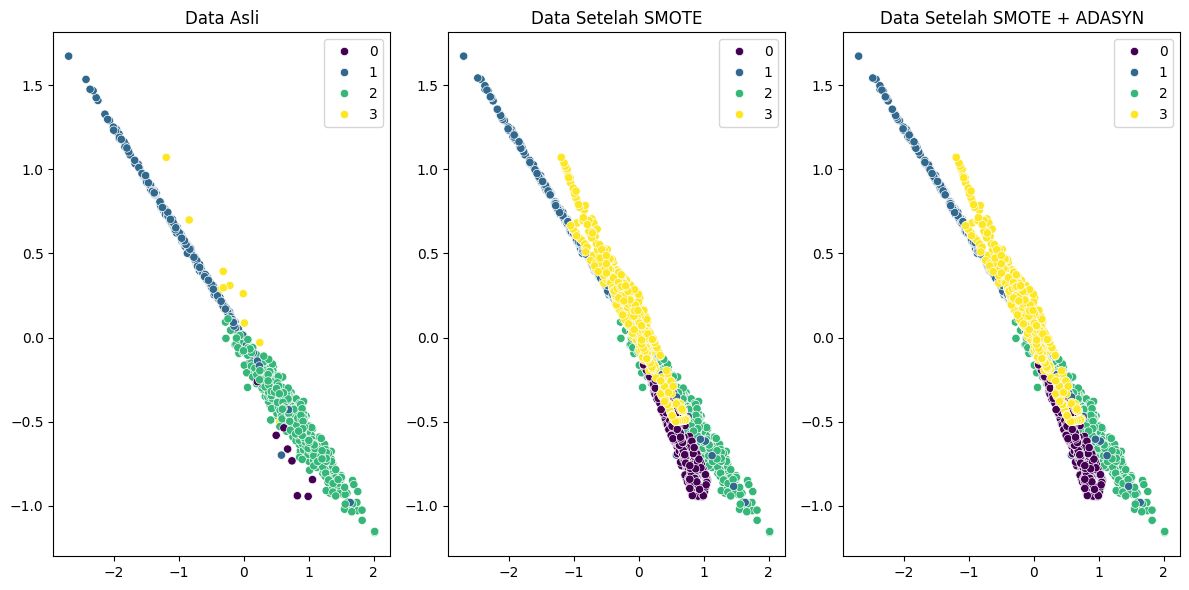

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

# Contoh data
X, y = make_classification(n_samples=1010, n_features=4, n_classes=4, n_clusters_per_class=1, weights=[0.01, 0.30, 0.68, 0.01], random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# SMOTE + ADASYN
adasyn = ADASYN(random_state=42)
X_smote_adasyn, y_smote_adasyn = adasyn.fit_resample(X_smote, y_smote)

# Visualisasi data asli
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', legend='full')
plt.title('Data Asli')

# Visualisasi data setelah SMOTE
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_smote[:, 0], y=X_smote[:, 1], hue=y_smote, palette='viridis', legend='full')
plt.title('Data Setelah SMOTE')

# Visualisasi data setelah SMOTE + ADASYN
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_smote_adasyn[:, 0], y=X_smote_adasyn[:, 1], hue=y_smote_adasyn, palette='viridis', legend='full')
plt.title('Data Setelah SMOTE + ADASYN')

plt.tight_layout()
plt.show()


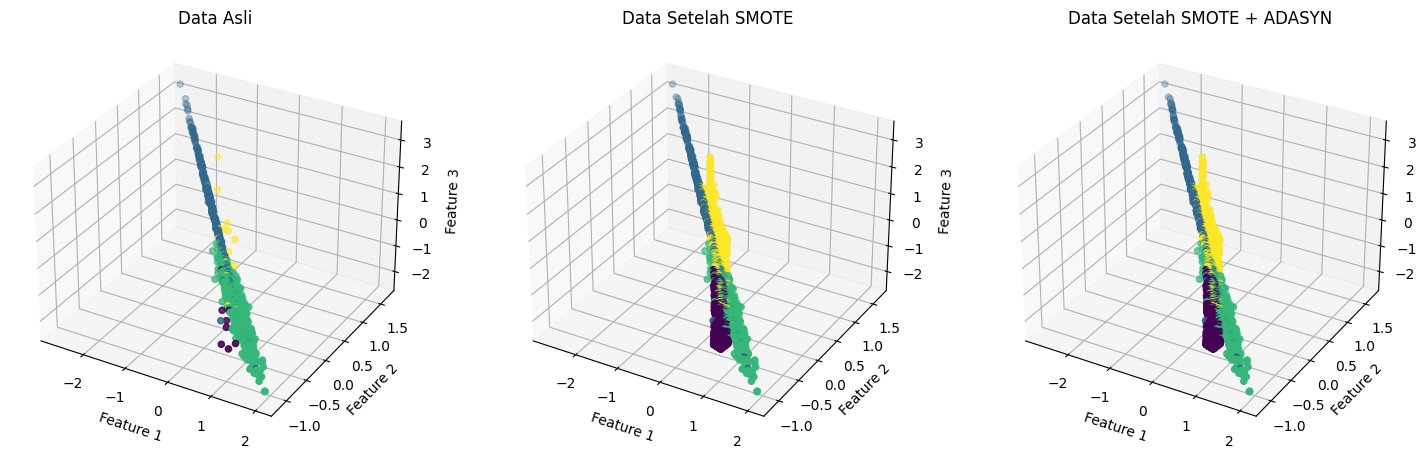

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

# Contoh data
X, y = make_classification(n_samples=1010, n_features=4, n_classes=4, n_clusters_per_class=1, weights=[0.01, 0.30, 0.68, 0.01], random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# SMOTE + ADASYN
adasyn = ADASYN(random_state=42)
X_smote_adasyn, y_smote_adasyn = adasyn.fit_resample(X_smote, y_smote)

# Visualisasi data asli dalam 3D
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(131, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Data Asli')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Visualisasi data setelah SMOTE dalam 3D
ax = fig.add_subplot(132, projection='3d')
scatter = ax.scatter(X_smote[:, 0], X_smote[:, 1], X_smote[:, 2], c=y_smote, cmap='viridis')
ax.set_title('Data Setelah SMOTE')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Visualisasi data setelah SMOTE + ADASYN dalam 3D
ax = fig.add_subplot(133, projection='3d')
scatter = ax.scatter(X_smote_adasyn[:, 0], X_smote_adasyn[:, 1], X_smote_adasyn[:, 2], c=y_smote_adasyn, cmap='viridis')
ax.set_title('Data Setelah SMOTE + ADASYN')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()


In [112]:
import numpy as np

# Hitung jumlah sampel per kelas di data asli
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Jumlah sampel per kelas di data asli:")
for cls, count in class_counts.items():
    print(f"Kelas {cls}: {count} sampel")


Jumlah sampel per kelas di data asli:
Kelas 0: 12 sampel
Kelas 1: 302 sampel
Kelas 2: 681 sampel
Kelas 3: 15 sampel


In [113]:
unique_smote, counts_smote = np.unique(y_smote, return_counts=True)
class_counts_smote = dict(zip(unique_smote, counts_smote))

# Hitung jumlah sampel per kelas setelah SMOTE + ADASYN
unique_smote_adasyn, counts_smote_adasyn = np.unique(y_smote_adasyn, return_counts=True)
class_counts_smote_adasyn = dict(zip(unique_smote_adasyn, counts_smote_adasyn))


In [114]:
print("\nJumlah sampel per kelas setelah SMOTE:")
for cls, count in class_counts_smote.items():
    print(f"Kelas {cls}: {count} sampel")

print("\nJumlah sampel per kelas setelah SMOTE + ADASYN:")
for cls, count in class_counts_smote_adasyn.items():
    print(f"Kelas {cls}: {count} sampel")


Jumlah sampel per kelas setelah SMOTE:
Kelas 0: 681 sampel
Kelas 1: 681 sampel
Kelas 2: 681 sampel
Kelas 3: 681 sampel

Jumlah sampel per kelas setelah SMOTE + ADASYN:
Kelas 0: 681 sampel
Kelas 1: 681 sampel
Kelas 2: 681 sampel
Kelas 3: 681 sampel


In [115]:
# Menampilkan jumlah data di setiap kelas setelah SMOTE-ADASYN
print("\nJumlah data di setiap kelas setelah SMOTE-ADASYN:")
print(pd.Series(y_resampled).value_counts())


Jumlah data di setiap kelas setelah SMOTE-ADASYN:
Class
3    688
2    688
1    688
4    688
Name: count, dtype: int64


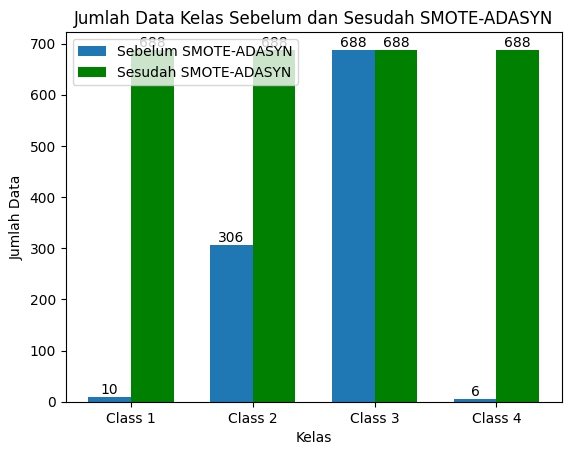

In [116]:
import matplotlib.pyplot as plt

# Jumlah data Class sebelum SMOTE-ADASYN
kelas_sebelum = [ 10, 306, 688, 6]
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

# Jumlah data Class setelah SMOTE-ADASYN
kelas_sesudah = [688, 688, 688, 688]

# Plot grafik
bar_width = 0.35
index = range(len(labels))

plt.bar(index, kelas_sebelum, bar_width, label='Sebelum SMOTE-ADASYN')
plt.bar([i + bar_width for i in index], kelas_sesudah, bar_width, label='Sesudah SMOTE-ADASYN', color='green')  # Mengubah warna menjadi hijau

plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Kelas Sebelum dan Sesudah SMOTE-ADASYN')
plt.xticks([i + bar_width/2 for i in index], labels)
plt.legend()

# Menampilkan angka di atas setiap bar
for i in index:
    plt.text(i, kelas_sebelum[i], str(kelas_sebelum[i]), ha='center', va='bottom')
    plt.text(i + bar_width, kelas_sesudah[i], str(kelas_sesudah[i]), ha='center', va='bottom')

plt.show()


# Split Dataset:

In [117]:
# Split Data untuk Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Train KNN Classifier:

In [118]:
# KNN model
knn = KNeighborsClassifier(
    n_neighbors=10,
    metric='euclidean',
    algorithm='auto',
    leaf_size=30,
    p=2,
    weights='uniform',
    metric_params=None,
    n_jobs=None
)
knn.fit(X_resampled, y_resampled)



KNeighborsClassifier(metric='euclidean', n_neighbors=10)

# Predict and Evaluate:

In [119]:
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix (KNN with Euclidean Distance and SMOTE-ADASYN):")
print(conf_matrix)

print("\nClassification Report (KNN with Euclidean Distance and SMOTE-ADASYN):")
print(class_report)


Confusion Matrix (KNN with Euclidean Distance and SMOTE-ADASYN):
[[134   0   0   0]
 [  3 135   0   0]
 [  0   4 133   5]
 [  0   0   0 137]]

Classification Report (KNN with Euclidean Distance and SMOTE-ADASYN):
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       134
           2       0.97      0.98      0.97       138
           3       1.00      0.94      0.97       142
           4       0.96      1.00      0.98       137

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551



# Generating Data Visualization Plots for the Confusion Matrix and ROC Curves

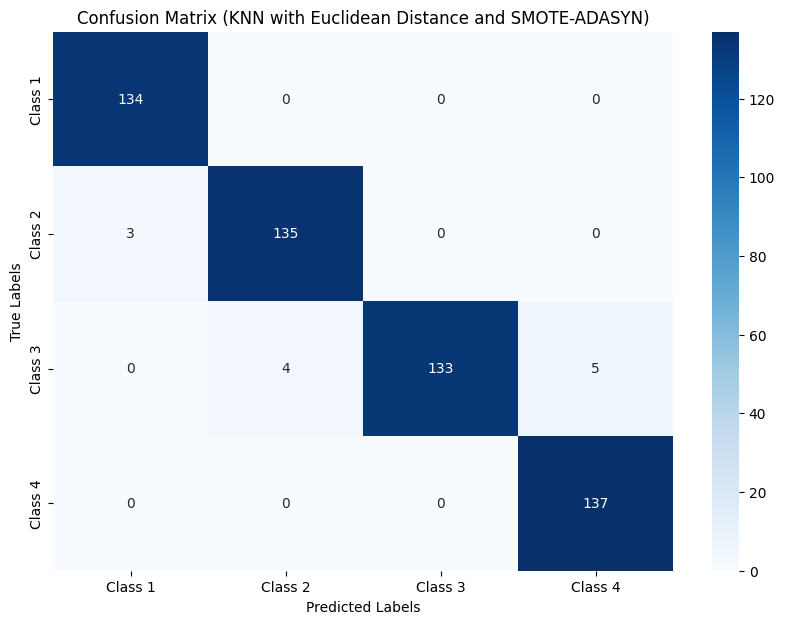

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Prediksi dan evaluasi
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (KNN with Euclidean Distance and SMOTE-ADASYN)')
plt.show()


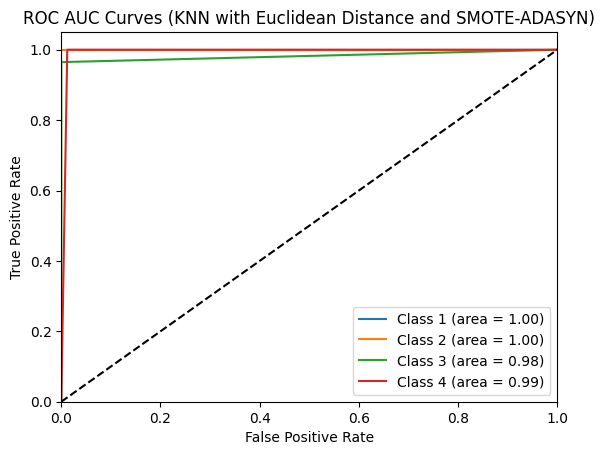

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Data Confusion Matrix
y_true = [1]*134 + [2]*138 + [3]*142 + [4]*137
y_pred = [1]*134 + [2]*135 + [2]*3 + [3]*133 + [3]*4 + [4]*5 + [4]*137

# Binarize the output
y_true_bin = label_binarize(y_true, classes=[1, 2, 3, 4])
n_classes = y_true_bin.shape[1]

# Get the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], [1 if p == (i+1) else 0 for p in y_pred])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], [1 if p == (i+1) else 0 for p in y_pred])

# Plotting the ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves (KNN with Euclidean Distance and SMOTE-ADASYN)')
plt.legend(loc="lower right")
plt.show()


# Test New Data in a Machine Learning Model

In [122]:
# Load dataset into a Pandas DataFrame
data_baru = pd.read_csv('/content/drive/MyDrive/Dataset/SynthesizedData.csv')

# Pastikan fitur sama dengan data latih
X_new = data_baru[['BOD', 'COD', 'FecalColiform', 'IP']]
y_new = data_baru['Class']

# Transformasi fitur baru
X_new = scaler.transform(X_new)

# Prediksi dengan model yang sudah dilatih
y_new_pred = knn.predict(X_new)


# Tampilkan confusion matrix
print("Confusion Matrix (New Data):")
conf_matrix = confusion_matrix(y_new, y_new_pred)
print(conf_matrix)

# Tampilkan classification report
print("\nClassification Report (New Data):")
print(classification_report(y_new, y_new_pred))




Confusion Matrix (New Data):
[[500   0   0   0]
 [ 12 438  50   0]
 [  0  24 466  10]
 [  0   0   0 500]]

Classification Report (New Data):
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       500
           2       0.95      0.88      0.91       500
           3       0.90      0.93      0.92       500
           4       0.98      1.00      0.99       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



# Creating Visualization Plots on New Test Data for the Confusion Matrix and ROC Curves

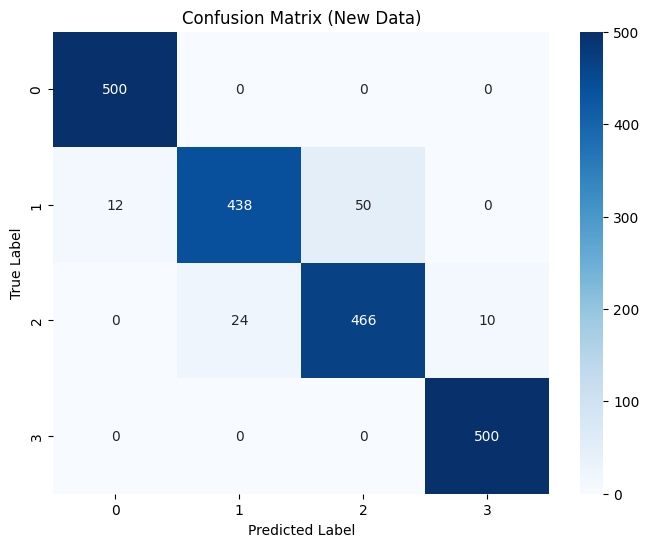

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (New Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



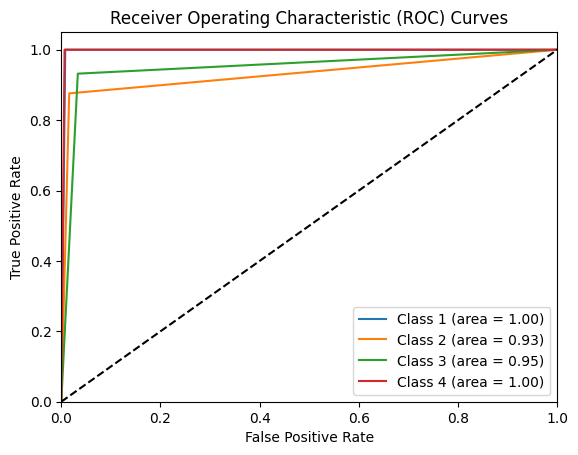

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_new_bin = label_binarize(y_new, classes=[1, 2, 3, 4])
n_classes = y_new_bin.shape[1]

# Get the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_new_bin[:, i], y_new_pred == (i + 1))
    roc_auc[i] = roc_auc_score(y_new_bin[:, i], y_new_pred == (i + 1))

# Plotting the ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


# Evaluating the Model on New Test Data

In [125]:
from sklearn.metrics import balanced_accuracy_score

# Hitung balanced accuracy
balanced_acc = balanced_accuracy_score(y_new, y_new_pred)
print("Balanced Accuracy (New Data):", balanced_acc)

Balanced Accuracy (New Data): 0.952


In [126]:
from sklearn.metrics import matthews_corrcoef

# Hitung Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_new, y_new_pred)
print("Matthews Correlation Coefficient (New Data):", mcc)

Matthews Correlation Coefficient (New Data): 0.9363034114659378


In [127]:
from sklearn.metrics import cohen_kappa_score

# Hitung Cohen's Kappa
kappa = cohen_kappa_score(y_new, y_new_pred)
print("Cohen's Kappa (New Data):", kappa)

Cohen's Kappa (New Data): 0.9359999999999999


# Simulation of a machine learning model for classifying the water quality of the Citarum River.

Parameter Table for the Range of Pollution Index Values for the Classification of Citarum River Water Quality:
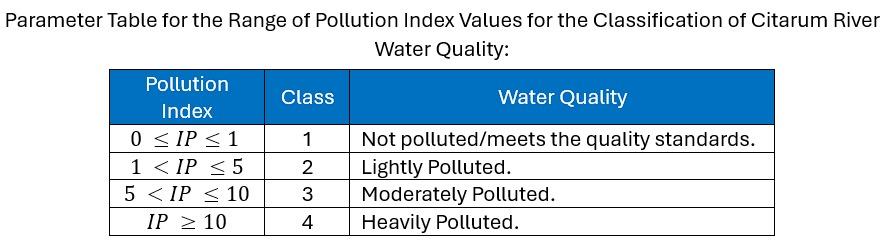



Input one row of parameter data for model simulation

In [128]:
# Fungsi untuk klasifikasi
def predict_quality(BOD, COD, FecalColiform, IP):
    input_data = scaler.transform([[BOD, COD, FecalColiform, IP]])
    prediction = knn.predict(input_data)[0]

    class_labels = {
        1: "Tidak tercemar/memenuhi baku mutu",
        2: "Tercemar ringan",
        3: "Tercemar sedang",
        4: "Tercemar berat"
    }

    return f"Kualitas Air Sungai Citarum: {class_labels.get(prediction, 'kelas tidak dikenal')} (Kelas {prediction})"

# Hasil Klasifikasi Kualitas Air Sungai Citarum
print(predict_quality(3.5, 40, 200, 1.6))  # Ganti dengan nilai parameter yang sesuai

Kualitas Air Sungai Citarum: Tidak tercemar/memenuhi baku mutu (Kelas 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Input each parameter data one by one for model simulation.

In [129]:
# Fungsi untuk klasifikasi
def predict_quality(BOD, COD, FecalColiform, IP):
    input_data = scaler.transform([[BOD, COD, FecalColiform, IP]])
    prediction = knn.predict(input_data)[0]

    class_labels = {
        1: "Tidak tercemar/memenuhi baku mutu",
        2: "Tercemar ringan",
        3: "Tercemar sedang",
        4: "Tercemar berat"
    }

    return f"Kualitas Air Sungai Citarum: {class_labels.get(prediction, 'kelas tidak dikenal')} (Kelas {prediction})"

# Fungsi untuk validasi input
def get_positive_float(prompt):
    while True:
        try:
            value = float(input(prompt))
            if value < 0:
                raise ValueError("Nilai tidak boleh negatif.🙏")
            return value
        except ValueError as e:
            print(f"Tolong masukkan nilai yang benar! {e}")

# Input parameter dari user
BOD = get_positive_float("Masukkan nilai BOD: ")
COD = get_positive_float("Masukkan nilai COD: ")
FecalColiform = get_positive_float("Masukkan nilai FecalColiform: ")
IP = get_positive_float("Masukkan nilai IP: ")

# Hasil Klasifikasi Kualitas Air Sungai Citarum
print(predict_quality(BOD, COD, FecalColiform, IP))

Masukkan nilai BOD: 1
Masukkan nilai COD: 1
Masukkan nilai FecalColiform: 1
Masukkan nilai IP: 1
Kualitas Air Sungai Citarum: Tidak tercemar/memenuhi baku mutu (Kelas 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


# Save Model Machine Learning

In [130]:
# Simpan model dan scaler ke file pickle
joblib.dump(knn, 'model_knn_euclidean.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [97]:
import sklearn
print(sklearn.__version__)


1.2.2
